# **PRACTICE LAB: LINEAR REGRESSION**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

# **Problem Açıklaması**
Bir restoran zincirinin CEO'su olduğunuzu ve yeni bir şube açmak için farklı şehirleri değerlendirdiğinizi varsayalım.

İşletmenizi daha yüksek kar elde edebileceğiniz şehirlere genişletmek istiyorsunuz.
Zincirin zaten çeşitli şehirlerde restoranları var ve bu şehirlerden elde edilen karlar ve nüfus verilerine sahipsiniz.
Yeni bir restoran için aday şehirler hakkında da verilere sahipsiniz.
Bu şehirler için şehir nüfus bilgilerine sahipsiniz.
Bu verileri kullanarak hangi şehirlerin işletmenize potansiyel olarak daha yüksek kar sağlayabileceğini belirlemekte size yardımcı olabilir misiniz?


In [7]:
x_train, y_train = load_data()

In [8]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [9]:
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [10]:
print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is: ', y_train.shape)
print('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


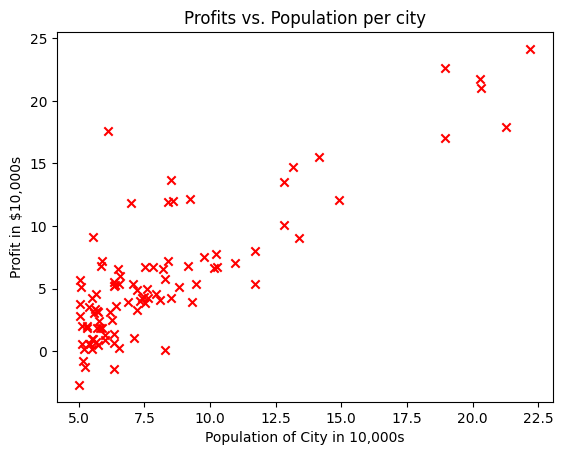

In [11]:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

# **Maliyet Hesaplama**

        x (ndarray): Şekil (m,) Modele girdi (Şehirlerin nüfusu)
        y (ndarray): Şekil (m,) Etiket (Şehirler için gerçek karlar)
        w, b (skaler): Modelin parametreleri

In [12]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0.0
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost

    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

w, b parametreleri için bazı başlangıç değerleri ile maliyeti hesaplanır


In [13]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)

print(type(cost))
print(f'cost at initial w: {cost:.3f}')

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
cost at initial w: 75.203
All tests passed!


# **Gradyan İnişi**

In [14]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_db += dj_db_i
    dj_dw += dj_dw_i

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [15]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)

print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [16]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


# **Toplu gradyan inişi kullanarak parametreleri öğrenme**

In [18]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}  ")

    return w, b, J_history, w_history

In [19]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74  
Iteration  150: Cost     5.31  
Iteration  300: Cost     4.96  
Iteration  450: Cost     4.76  
Iteration  600: Cost     4.64  
Iteration  750: Cost     4.57  
Iteration  900: Cost     4.53  
Iteration 1050: Cost     4.51  
Iteration 1200: Cost     4.50  
Iteration 1350: Cost     4.49  
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [20]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

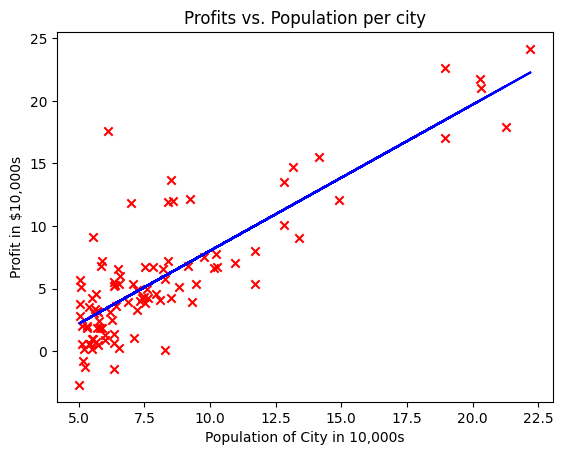

In [21]:
plt.plot(x_train, predicted, c = 'b')

plt.scatter(x_train, y_train, marker = 'x', c = 'r')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [22]:
predict1 = 3.5 * w +b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))

predict2 = 7.0 * w +b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2 * 10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
